In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import tensorflow as tf

### Testing Data output from SAM

This model could be taught to a simple machine learning model outlined from this paper:
https://www.sciencedirect.com/science/article/abs/pii/S0960148107002261

Taking a 3 - 4 - 1 Neural Network Model, we will try to do the same thing in tensorflow with modelled data.

In [4]:
PWD = os.getcwd()
DATA_DIR = os.path.join(PWD, "windData")
SAM_FILE = os.path.join(DATA_DIR, "random_point_power_SAM.csv")
RAW_DATA = os.path.join(DATA_DIR, "ind_wind_pa.csv")

In [6]:
# First Exporting modeled output data from SAM, reading into pandas
sam_df = pd.read_csv(SAM_FILE)
sam_df.drop(inplace=True, columns=["Time stamp"])
sam_df.head()

,System power generated | (kW)
0,24446.3
1,24840.2
2,31062.7
3,33277.9
4,32682.4


In [7]:
# Next, Read in cleaned raw data files
raw_df = pd.read_csv(RAW_DATA)
raw_df.head()

,Temperature,Direction,Speed,Pressure
0,19.36,45.45,9.35,0.938268
1,19.17,40.62,9.39,0.938367
2,18.43,34.26,10.27,0.937873
3,18.06,36.08,10.64,0.937774
4,17.93,37.09,10.54,0.937676


In [26]:
data_df = raw_df.join(sam_df)
#Drop Zero Data
data_df = data_df.loc[data_df['System power generated | (kW)'] != 0].copy()
max_array = data_df.max()
print(max_array)
print(type(max_array))
# Data Normalisation based on min-max values in each numerical column
data_df = (data_df-data_df.min())/(data_df.max()-data_df.min())
data_df.head()

Temperature                         37.560000
Direction                          359.970000
Speed                               20.690000
Pressure                             0.945078
System power generated | (kW)    41305.100000
dtype: float64
<class 'pandas.core.series.Series'>


,Temperature,Direction,Speed,Pressure,System power generated | (kW)
0,0.282617,0.126212,0.342990,0.674528,0.591841
1,0.275128,0.112793,0.345307,0.679245,0.601378
2,0.245960,0.095124,0.396292,0.655660,0.752027
3,0.231376,0.100181,0.417729,0.650943,0.805658
4,0.226251,0.102987,0.411935,0.646226,0.791241


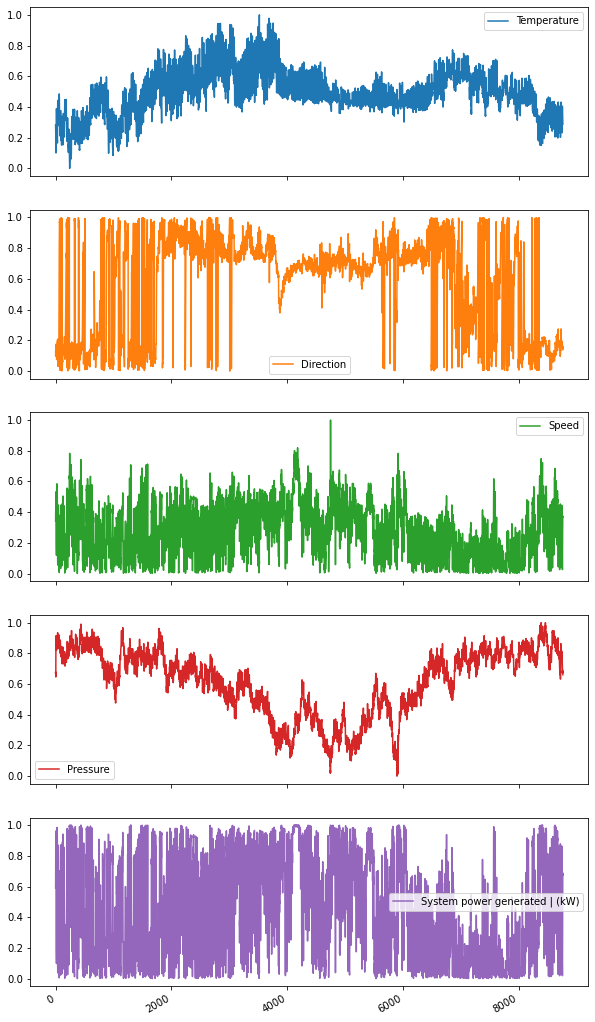

In [30]:
data_df.plot(subplots=True, figsize=(10, 20)); plt.legend(loc='best')

In [17]:
# Make data pipeline in tensorflow
target = data_df.pop('System power generated | (kW)')
dataset = tf.data.Dataset.from_tensor_slices((data_df.values, target.values))


In [18]:
# Shuffle dataset
train_dataset = dataset.shuffle(len(data_df)).batch(1)

In [19]:
# Build model
def get_compiled_model():
  model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1)
  ])

  model.compile(optimizer='adam',
                loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                metrics=['accuracy'])
  return model

In [20]:
model = get_compiled_model()
model.fit(train_dataset, epochs=15)

Train for 7928 steps
Epoch 1/15
7928/7928 [==============================] - 20s 2ms/step - loss: 0.4870 - accuracy: 0.0134
Epoch 2/15
7928/7928 [==============================] - 19s 2ms/step - loss: 0.4365 - accuracy: 0.0145
Epoch 3/15
7928/7928 [==============================] - 19s 2ms/step - loss: 0.4365 - accuracy: 0.0145
Epoch 4/15
7928/7928 [==============================] - 22s 3ms/step - loss: 0.4365 - accuracy: 0.0145
Epoch 5/15
7928/7928 [==============================] - 20s 2ms/step - loss: 0.4364 - accuracy: 0.0145
Epoch 6/15
7928/7928 [==============================] - 19s 2ms/step - loss: 0.4364 - accuracy: 0.0145
Epoch 7/15
7928/7928 [==============================] - 19s 2ms/step - loss: 0.4364 - accuracy: 0.0145
Epoch 8/15
7928/7928 [==============================] - 19s 2ms/step - loss: 0.4363 - accuracy: 0.0145
Epoch 9/15
7928/7928 [==============================] - 18s 2ms/step - loss: 0.4363 - accuracy: 0.0145
Epoch 10/15
7928/7928 [=============================